<a href="https://colab.research.google.com/github/mryiadom/Quant-Finance-Path/blob/main/01-Foundations/week_02_Cash_Flows_%26_Annuities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Cash Flows & Annuities – Technical Documentation

## 1. Core Definitions
* **Annuity:** A sequence of equal payments made at fixed intervals.
* **Ordinary Annuity:** Payments occur at the **end** of each period (e.g., standard mortgages, car loans, corporate bond coupons).
* **Annuity Due:** Payments occur at the **beginning** of each period (e.g., lease payments, insurance premiums, monthly rent).

## 2. The Quant Golden Rule: Unit Synchronization
In financial modeling, the interest rate ($r$) and the number of periods ($n$) must match the frequency of the payments ($P$).
* **Monthly Rate ($r$):** $\frac{\text{Annual Rate}}{12}$
* **Total Monthly Periods ($n$):** $\text{Years} \times 12$

---

## 3. Future Value (FV) Formulas
*Used to calculate the total accumulation of a savings plan or pension fund.*

### Ordinary Annuity (End of Period)
$$FV_{ordinary} = P \times \frac{(1 + r)^n - 1}{r}$$

### Annuity Due (Beginning of Period)
$$FV_{due} = \left( P \times \frac{(1 + r)^n - 1}{r} \right) \times (1 + r)$$
> **Logic:** Because payments are made at the start, every payment earns exactly one extra period of interest compared to an ordinary annuity.

---

## 4. Present Value (PV) Formulas
*Used to determine the value today of a future stream of income, or to calculate loan principals.*

### Ordinary Annuity (End of Period)
$$PV_{ordinary} = P \times \frac{1 - (1 + r)^{-n}}{r}$$

### Annuity Due (Beginning of Period)
$$PV_{due} = \left( P \times \frac{1 - (1 + r)^{-n}}{r} \right) \times (1 + r)$$

---

## 5. The "Project 1" Formula: Solving for Monthly Payment ($P$)
To find the fixed monthly payment required to pay off a loan (amortisation), we rearrange the $PV_{ordinary}$ formula:

$$P = \frac{PV \times r}{1 - (1 + r)^{-n}}$$

## 6. Amortisation Logic (For Loops)
For each month in the loan term, the logic follows these steps:
1.  **Interest Payment:** $\text{Current Balance} \times r$
2.  **Principal Payment:** $\text{Fixed Monthly Payment} (P) - \text{Interest Payment}$
3.  **New Balance:** $\text{Current Balance} - \text{Principal Payment}$

In [24]:
import math

In [25]:
def future_value_of_ordinary_annuity(p, r, n):
  '''
  p = payments
  r = interest rate
  n = periods
  '''

  fva = p * ((pow(1 + r, n) - 1) / r)
  return(fva)

#set the variables
payments = 2000
interest_rate = 0.15
period = 7

# Run the calculation
future_value = future_value_of_ordinary_annuity(payments, interest_rate, period)
print(f'The futuve value is £{future_value:,.2f}')

The futuve value is £22,133.60


In [26]:
def future_value_of_annuity_due(p, r, n):
  '''
  p = payments
  r = interest rate
  n = periods
  '''

  fvad = (p * ((pow(1 + r, n) - 1) / r)) * (1 + r)
  return(fvad)

#set the variables
payments = 2000
interest_rate = 0.15
period = 7

# Run the calculation
future_value = future_value_of_annuity_due(payments, interest_rate, period)
print(f'The futuve value is £{future_value:,.2f}')

The futuve value is £25,453.64


In [27]:
def present_value_of_ordinary_annuity(p, r, n):
  '''
  p = payments
  r = interest rate
  n = periods
  '''

  pva = p * ((1 - pow((1 + r), -n)) / r)
  return(pva)

#set the variables
payments = 4000
interest_rate = 0.14
period = 4

# Run the calculation
present_value = present_value_of_ordinary_annuity(payments, interest_rate, period)
print(f'The present value is £{present_value:,.2f}')

The present value is £11,654.85


In [28]:
def present_value_of_annuity_due(p, r, n):
  '''
  p = payments
  r = interest rate
  n = periods
  '''

  pvad = p * ((1 - pow((1 + r), -n)) / r) * (1 + r)
  return(pvad)

#set the variables
payments = 4000
interest_rate = 0.14
period = 4

# Run the calculation
present_value = present_value_of_annuity_due(payments, interest_rate, period)
print(f'The present value is £{present_value:,.2f}')

The present value is £13,286.53


# Mortgage Amortisation Generator

In [34]:
def calculate_monthly_payment(loan_amount, r, n):
  '''
  Calculates the fixed monthly payment for a mortgage (PV Ordinary Annuity).
  loan_amount: Total principal borrowed
  r: Annual interest rate (as a percentage, e.g., 5 for 5%)
  n: Loan term in years
  '''
  n = n * 12 # convert years to monhtly payments
  r = ((r / 100)) / 12 #monthly percentage

  p = (loan_amount * r) / (1 - pow((1 + r), -n))
  return(p)


#set the variables
loan = 300000
interest_rate = 5
years = 30

# Run the calculation
monthly_payment = calculate_monthly_payment(loan, interest_rate, years)
print(f'With a loan amount of £{loan:,.2f} and an annual interest of {interest_rate}%, you"re monthly payments will be £{monthly_payment:,.2f}')


With a loan amount of £300,000.00 and an annual interest of 5%, you"re monthly payments will be £1,610.46


In [35]:
# Initial Setup
balance = loan  # Start with £300,000
monthly_r = (interest_rate / 100) / 12
total_months = years * 12

print(f"{'Month':<8} | {'Interest':<10} | {'Principal':<10} | {'Balance':<10}")
print("-" * 50)

# The Amortization Loop
for month in range(1, 11): # Let's just look at the first 10 months for now
    interest_payment = balance * monthly_r
    principal_payment = monthly_payment - interest_payment
    balance = balance - principal_payment

    print(f"{month:<8} | £{interest_payment:<9.2f} | £{principal_payment:<9.2f} | £{balance:<9.2f}")

Month    | Interest   | Principal  | Balance   
--------------------------------------------------
1        | £1250.00   | £360.46    | £299639.54
2        | £1248.50   | £361.97    | £299277.57
3        | £1246.99   | £363.48    | £298914.09
4        | £1245.48   | £364.99    | £298549.10
5        | £1243.95   | £366.51    | £298182.59
6        | £1242.43   | £368.04    | £297814.56
7        | £1240.89   | £369.57    | £297444.99
8        | £1239.35   | £371.11    | £297073.87
9        | £1237.81   | £372.66    | £296701.22
10       | £1236.26   | £374.21    | £296327.01


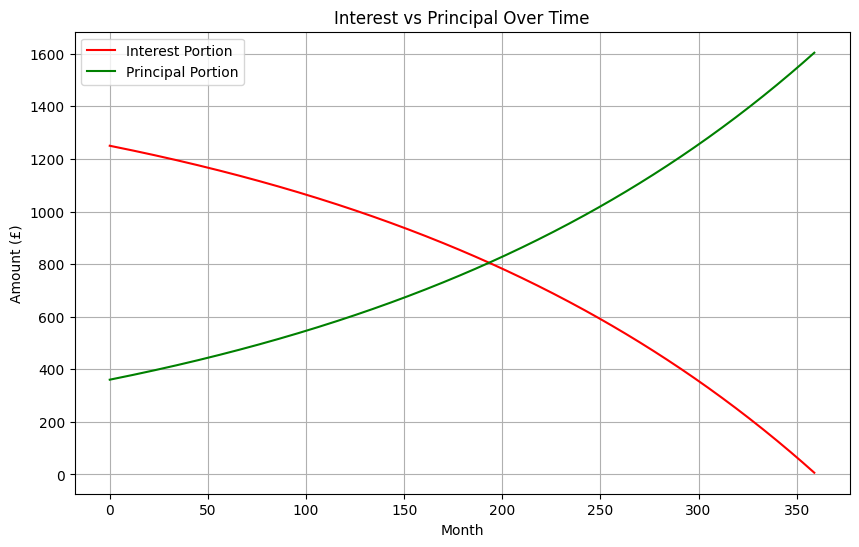

In [36]:
import matplotlib.pyplot as plt

# Lists to store our data for graphing
interest_history = []
principal_history = []
balance = loan

# Run the loop for the FULL term (360 months)
for month in range(1, total_months + 1):
    interest_p = balance * monthly_r
    principal_p = monthly_payment - interest_p
    balance -= principal_p

    interest_history.append(interest_p)
    principal_history.append(principal_p)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(interest_history, label="Interest Portion", color="red")
plt.plot(principal_history, label="Principal Portion", color="green")
plt.title("Interest vs Principal Over Time")
plt.xlabel("Month")
plt.ylabel("Amount (£)")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
total_paid = monthly_payment * total_months
total_interest = total_paid - loan

print(f"Total Amount Paid: £{total_paid:,.2f}")
print(f"Total Interest Paid: £{total_interest:,.2f}")

Total Amount Paid: £579,767.35
Total Interest Paid: £279,767.35


# Pension Simulator

In [38]:
def calculate_pension_growth(monthly_investment, annual_rate, years):
    # Unit Synchronization
    r = (annual_rate / 100) / 12
    n = years * 12

    # FV Formula
    fv = monthly_investment * ((pow(1 + r, n) - 1) / r)
    return fv

# Variables
monthly_contribution = 500
growth_rate = 7 # 7% annual return
term_years = 40

total_saved = calculate_pension_growth(monthly_contribution, growth_rate, term_years)

print(f"After {term_years} years, your investment grows to: £{total_saved:,.2f}")

After 40 years, your investment grows to: £1,312,406.70


In [39]:
balance = 0
monthly_r = (growth_rate / 100) / 12

print(f"{'Year':<8} | {'Total Balance':<15}")
print("-" * 25)

for month in range(1, (term_years * 12) + 1):
    # Add interest to the existing balance first
    interest_earned = balance * monthly_r
    # Add the new deposit + the interest
    balance = balance + monthly_contribution + interest_earned

    # Print every 5 years (60 months) so the list isn't too long
    if month % 60 == 0:
        year = month // 12
        print(f"Year {year:<4} | £{balance:,.2f}")

Year     | Total Balance  
-------------------------
Year 5    | £35,796.45
Year 10   | £86,542.40
Year 15   | £158,481.15
Year 20   | £260,463.33
Year 25   | £405,035.85
Year 30   | £609,985.50
Year 35   | £900,527.30
Year 40   | £1,312,406.70
